In [1]:
!pip install --upgrade mplfinance


  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 4.3 MB/s eta 0:00:00


In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r"C:\Users\12036\Desktop\preprocessed_CAC40.csv", parse_dates = ["Date"])

df.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [5]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [7]:
def data_company_specific(company, start, end):
    comp_data = df[df["Name"] == company]
    
    filtered_data = comp_data[(comp_data["Date"]> start) & (comp_data["Date"] < end)]
    return filtered_data


In [36]:
######
'''Display a Company specific from "Name" column'''

comp_name = random.choice(df["Name"].unique().tolist())

start_date = dt.datetime(2014,1,1)
end_date = dt.datetime(2020,1,1)

new_specific_df = data_company_specific(comp_name, start_date, end_date)

new_specific_df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
18267,Bouygues,2019-12-30,38.11,38.15,38.19,38.11,NaN
18268,Bouygues,2019-12-27,37.94,38.32,38.35,37.94,NaN
18269,Bouygues,2019-12-23,38.14,38.40,38.45,38.14,NaN
18270,Bouygues,2019-12-20,37.91,38.25,38.30,37.91,NaN
18271,Bouygues,2019-12-19,38.55,38.07,38.59,38.05,NaN


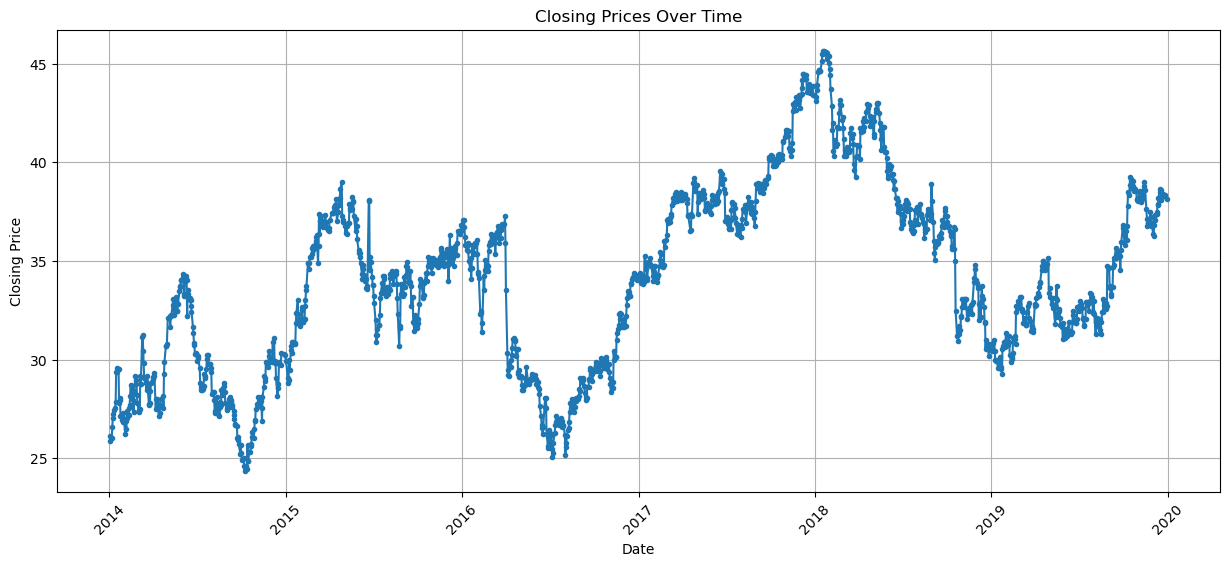

In [37]:
############ Line chart of Closing prices ############

new_specific_df['Date'] = pd.to_datetime(new_specific_df['Date'])

plt.figure(figsize=(15, 6))
plt.plot(new_specific_df['Date'], new_specific_df['Closing_Price'], marker='.')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

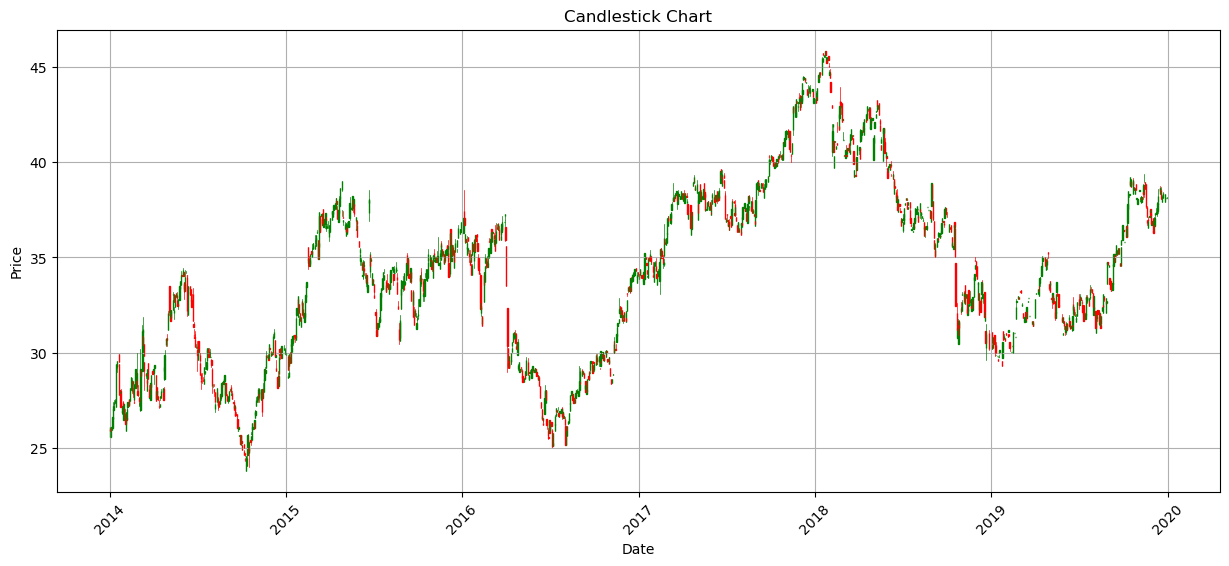

In [38]:
############# Candle Stick Chart based on Dates ############

matplotlib_date = mdates.date2num(new_specific_df['Date'])

# Create an array of tuples in the required format
ohlc = np.vstack((matplotlib_date, new_specific_df['Open'], new_specific_df['Daily_High'], new_specific_df['Daily_Low'], new_specific_df['Closing_Price'])).T

plt.figure(figsize=(15, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

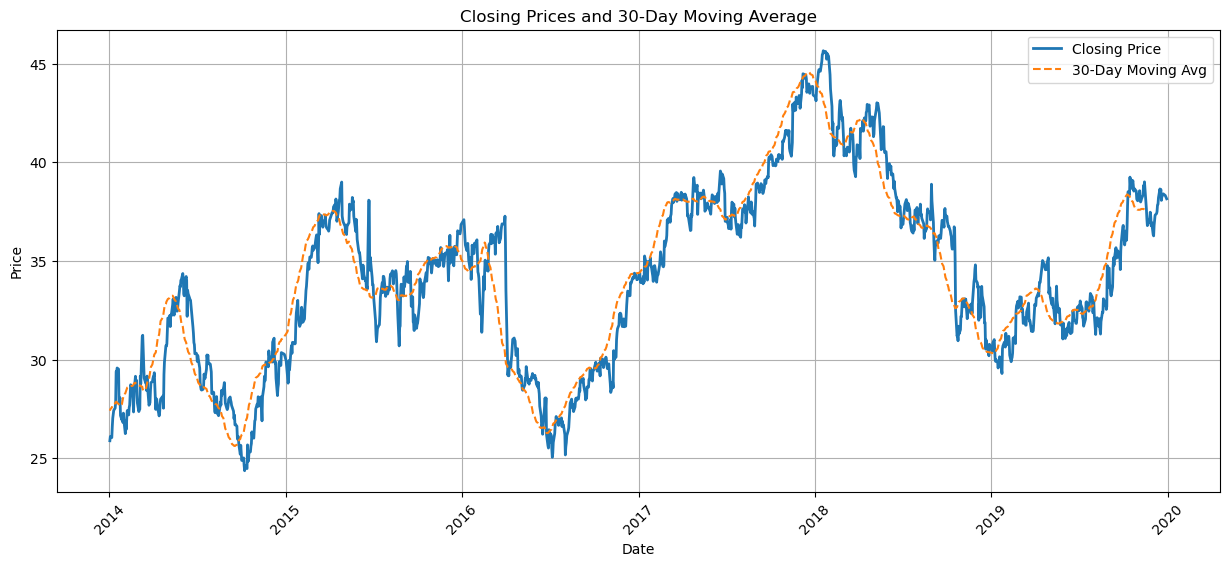

In [39]:
############### Closing Price ###############

window = 30
plt.figure(figsize=(15, 6))
plt.plot(new_specific_df['Date'], new_specific_df['Closing_Price'], label='Closing Price', linewidth=2)
plt.plot(new_specific_df['Date'], new_specific_df['Closing_Price'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

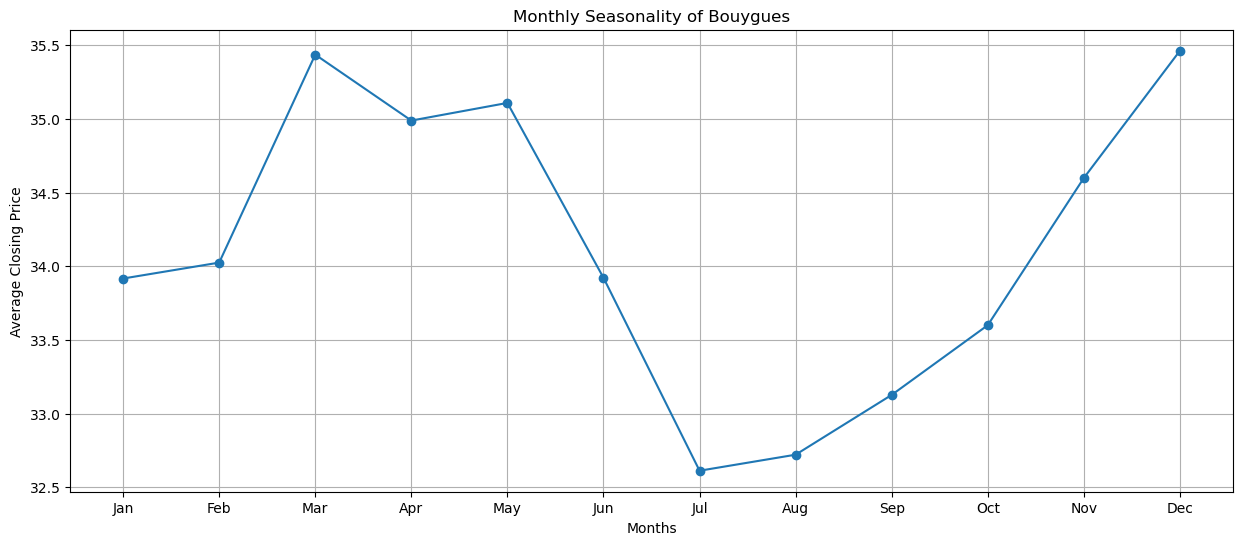

In [40]:
# Monthly Seasonality of Closing Prices
new_specific_df['Month'] = new_specific_df['Date'].dt.month

monthly_average = new_specific_df.groupby('Month')['Closing_Price'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title(f'Monthly Seasonality of {comp_name}')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [41]:
new_specific_df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume,Month
18267,Bouygues,2019-12-30,38.11,38.15,38.19,38.11,NaN,12
18268,Bouygues,2019-12-27,37.94,38.32,38.35,37.94,NaN,12
18269,Bouygues,2019-12-23,38.14,38.40,38.45,38.14,NaN,12
18270,Bouygues,2019-12-20,37.91,38.25,38.30,37.91,NaN,12
18271,Bouygues,2019-12-19,38.55,38.07,38.59,38.05,NaN,12


In [42]:
new2_specific_df = new_specific_df.reset_index()['Closing_Price']
new2_specific_df.head()

0    38.15
1    38.32
2    38.40
3    38.25
4    38.07
Name: Closing_Price, dtype: float64

In [43]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new2_specific_df).reshape(-1,1))

In [44]:
######### TRAIN and TEST #########
###### 80 to 20 SPLIT #########
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [45]:
n_past = 60

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [46]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1151, 60)
(1151,)


Testing set size:-
(243, 60)
(243,)


(None, None)

In [47]:
########### RESHAPING ############

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
# Initialize a sequential model
model = Sequential()

# First LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with 50 units
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [49]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [50]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.h5', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our lstm model
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
36/36 [==============================] - 7s 61ms/step - loss: 0.0307 - val_loss: 0.0062
Epoch 2/100
36/36 [==============================] - 1s 36ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 3/100
36/36 [==============================] - 1s 35ms/step - loss: 0.0068 - val_loss: 0.0044
Epoch 4/100
36/36 [==============================] - 1s 36ms/step - loss: 0.0060 - val_loss: 0.0042
Epoch 5/100
36/36 [==============================] - 1s 35ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 6/100
36/36 [==============================] - 1s 36ms/step - loss: 0.0061 - val_loss: 0.0037
Epoch 7/100
36/36 [==============================] - 1s 35ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 8/100
36/36 [==============================] - 1s 36ms/step - loss: 0.0054 - val_loss: 0.0033
Epoch 9/100
36/36 [==============================] - 1s 35ms/step - loss: 0.0048 - val_loss: 0.0036
Epoch 10/100
36/36 [==============================] - 1s 35ms/step - loss: 0.0049 - val_loss: 0.0035

36/36 [==============================] - 1s 38ms/step - loss: 0.0016 - val_loss: 8.9898e-04
Epoch 83/100
36/36 [==============================] - 1s 37ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 84/100
36/36 [==============================] - 1s 38ms/step - loss: 0.0018 - val_loss: 8.5320e-04
Epoch 85/100
36/36 [==============================] - 1s 37ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 86/100
36/36 [==============================] - 1s 37ms/step - loss: 0.0016 - val_loss: 9.8718e-04
Epoch 87/100
36/36 [==============================] - 1s 37ms/step - loss: 0.0014 - val_loss: 8.5623e-04
Epoch 88/100
36/36 [==============================] - 1s 39ms/step - loss: 0.0015 - val_loss: 8.7670e-04
Epoch 89/100
36/36 [==============================] - 1s 37ms/step - loss: 0.0017 - val_loss: 9.0030e-04
Epoch 90/100
36/36 [==============================] - 1s 37ms/step - loss: 0.0016 - val_loss: 9.0268e-04
Epoch 91/100
36/36 [==============================] - 1s 38ms/step - loss: 0

In [51]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 [==============================] - 0s 11ms/step


In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
# Train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

34.90256235922685
29.061403437453944


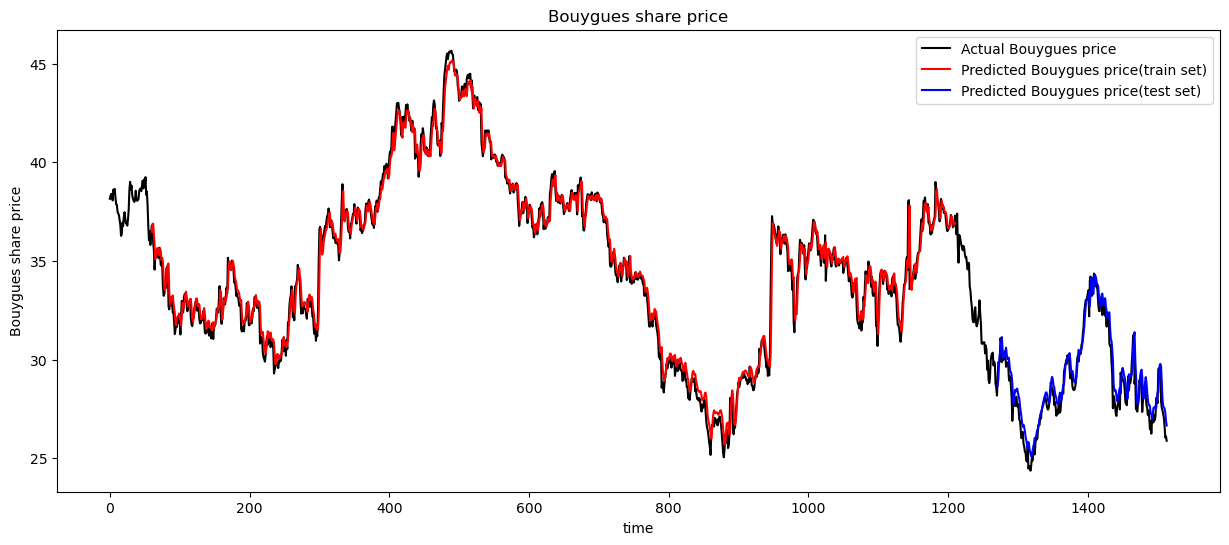

In [54]:
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new2_specific_df)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new2_specific_df)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new2_specific_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual {comp_name} price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted {comp_name} price(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted {comp_name} price(test set)")

plt.title(f"{comp_name} share price")
plt.xlabel("time")
plt.ylabel(f"{comp_name} share price")
plt.legend()
plt.show()

In [55]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1)

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = next_day_prediction  # Update the last element with the new prediction

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")

1/1 [==============================] - 0s 18ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = 26.654441833496094
Day 2: Predicted Price = 26.872562408447266
Day 3: Predicted Price = 27.258329391479492
Day 4: Predicted Price = 27.66525650024414
Day 5: Predicted Price = 28.046722412109375
Day 6: Predicted Price = 28.386333465576172
Day 7: Predicted Price = 28.678741455078125
Day 8: Predicted Price = 28.925613403320312
Day 9: Predicted Price = 29.13307762145996
Day 10: Predicted Price = 29.309261322021484


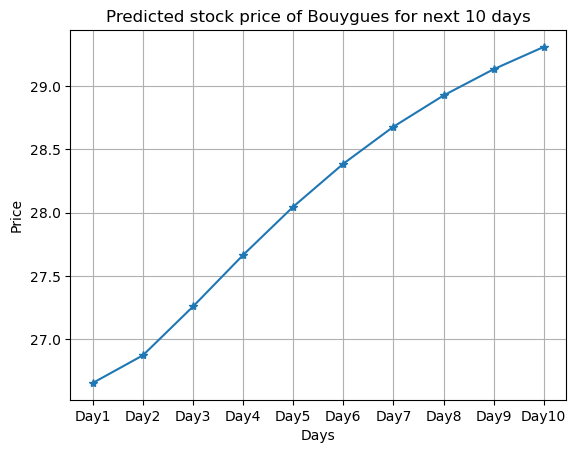

In [56]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of {comp_name} for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()